In [1]:
#im skipping leap days currently in multiple places
import sys
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import seaborn
import random
import json
import pickle
import time
import copy

import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
def print_model_scores(scores, name):
    print("====" + name + "====")
    for k in scores:
        print(k + ": " + str(scores[k]))
    print("=================\n")
    
def fone(prec, rec):
    f = 2.0 / ( (1.0/prec) + (1.0/rec) )
    return(f)

In [3]:
#high recall means no false negatives
#high precision means no false positives

In [4]:
report_path = "/home/chase/projects/peakload/data/nets/reports"

#need to write models to seperate folder
reports = os.listdir(report_path)
reports

['tanh_sigmoid_LOOKBACK_168_HIDDEN_1_1000_HIDDEN_2_1000_HIDDEN_3_1000_LOSS_EW_EPOCHS_100_stats',
 'tanh_dropout_LOOKBACK_168_HIDDEN_1_2500_HIDDEN_2_1000_HIDDEN_3_100_LOSS_EW_EPOCHS_100_DATA_directory_stats',
 'double_sigmoid_LOOKBACK_168_HIDDEN_1_250_HIDDEN_2_250_LOSS_EW_EPOCHS_100_stats',
 'tanh_sigmoid_weather_LOOKBACK_168_HIDDEN_1_250_HIDDEN_2_250_HIDDEN_3_50_LOSS_EW_EPOCHS_200_DATA_directory_stats',
 'tanh_sigmoid_LOOKBACK_168_HIDDEN_1_1000_HIDDEN_2_500_HIDDEN_3_500_LOSS_EW_EPOCHS_100_stats',
 'single_sigmoid_LOOKBACK_168_HIDDEN_1_1000_LOSS_L1_EPOCHS_100_stats',
 'tanh_sigmoid_LOOKBACK_168_HIDDEN_1_1000_HIDDEN_2_250_HIDDEN_3_250_LOSS_EW_EPOCHS_100_stats',
 'tanh_sigmoid_LOOKBACK_168_HIDDEN_1_250_HIDDEN_2_250_HIDDEN_3_250_LOSS_EW_EPOCHS_100_stats',
 'tanh_dropout_LOOKBACK_168_HIDDEN_1_1500_HIDDEN_2_250_HIDDEN_3_25_LOSS_EW_EPOCHS_100_DATA_directory_stats',
 'tanh_sigmoid_LOOKBACK_168_HIDDEN_1_1500_HIDDEN_2_1500_HIDDEN_3_1500_LOSS_EW_EPOCHS_100_stats',
 'tanh_dropout_LOOKBACK_168_HIDD

In [5]:


thresh = 0.99
max_rec = ['blank', 0.0]
max_prec = ['blank', 0.0]
min_thresh_loss = ['blank', 1000]
min_mean_set_loss = ['blank', 1000.0]
max_fone = ['blank', 0.0]
wprecs = []
wrecs = []
precs = []
recs = []

for model in reports:
    currpath = report_path + "/" + model
    outputs = os.listdir(currpath)
    for res in outputs:
        with open(currpath + "/" + res, 'rb') as d:
            stats = pickle.load(d)
            stats = stats['test_model_scores']
            
        if stats['batch_precision'][thresh] > max_prec[1]:
            max_prec[0] = model
            max_prec[1] = stats['batch_precision'][thresh]
            
        if stats['batch_recall'][thresh] > max_rec[1]:
            max_rec[0] = model
            max_rec[1] = stats['batch_recall'][thresh]
            
        if stats['thresh_losses'][thresh] < min_thresh_loss[1]:
            min_thresh_loss[0] = model
            min_thresh_loss[1] = stats['thresh_losses'][thresh]
            
        f = fone(stats['batch_precision'][thresh], stats['batch_recall'][thresh])
        if f > max_fone[1]:
            max_fone[0] = model
            max_fone[1] = f
            
        if stats['mean_set_loss'] < min_mean_set_loss[1]:
            min_mean_set_loss[0] = model
            min_mean_set_loss[1] = stats['mean_set_loss']
            
        tokens = model.split("_")
        if tokens[1] == "dropout" or tokens[2] == "weather":
            wprecs.append(stats['batch_precision'][thresh])
            wrecs.append(stats['batch_recall'][thresh])
        
        else:
            precs.append(stats['batch_precision'][thresh])
            recs.append(stats['batch_recall'][thresh])
        #print_model_scores(stats, model)
        print(stats['batch_precision'][thresh], stats['batch_recall'][thresh])

0.22643191944165442 0.88686490607888
0.6765944645006018 0.2065597667638484
0.27389132340052585 0.8571428571428572
0.8054655870445345 0.22523485584710073
0.2884460172595766 0.7825639426076108
0.0878841599282481 1.0
0.38136054421768706 0.7113918347542801
0.33977003319108584 0.8244298884036875
0.6932746979388771 0.24185293164885005
0.1836827122153209 0.9569106536355445
0.6899044205495819 0.22715419501133785
0.18071042570499976 0.8003327095030152
0.8562015503875969 0.2377146096533852
0.7845622119815668 0.18146663427275675
0.7450084602368866 0.15890427599611273
0.3754568969172709 0.665387814514452
0.721179302045728 0.1967930029154519
0.8856154910096818 0.21290492387431165
0.1054662168932782 1.0
0.7325295075295074 0.20592403628117917
0.2246456729866717 0.641768905524364
0.17425332211084757 0.7387017397934429
0.8764652014652016 0.13089569160997733
0.8888888888888888 0.10549481697440882
0.8984946236559139 0.1034054097829608
0.24937458854509545 0.9073126776183544
0.6654471544715447 0.2192338840

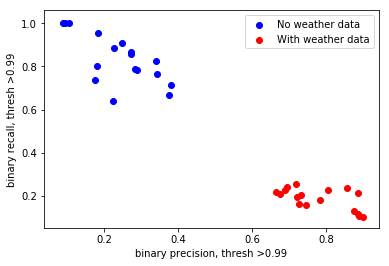

In [6]:
plt.scatter(precs, recs, color="blue", label="No weather data")
plt.scatter(wprecs, wrecs, color="red", label="With weather data")
plt.xlabel("binary precision, thresh >0.99")
plt.ylabel("binary recall, thresh >0.99")
plt.legend()
plt.show()

In [4]:
print(max_prec)

['tanh_sigmoid_weather_LOOKBACK_168_HIDDEN_1_7500_HIDDEN_2_250_HIDDEN_3_50_LOSS_EW_EPOCHS_200_DATA_directory_stats', 0.8984946236559139]


In [8]:
print(max_rec)

['single_sigmoid_LOOKBACK_168_HIDDEN_1_1000_LOSS_L1_EPOCHS_100_stats', 1.0]


In [13]:
print(max_fone)

['tanh_sigmoid_LOOKBACK_168_HIDDEN_1_1000_HIDDEN_2_250_HIDDEN_3_250_LOSS_EW_EPOCHS_100_stats', 0.4965384335454663]


In [5]:
print(min_thresh_loss)
print(min_thresh_loss[1] * 8760)

['tanh_dropout_LOOKBACK_168_HIDDEN_1_1500_HIDDEN_2_250_HIDDEN_3_25_LOSS_EW_EPOCHS_100_DATA_directory_stats', 0.01570262979919514]
137.55503704094943


In [6]:
print(min_mean_set_loss)
print(min_mean_set_loss[1] * 8760)

['tanh_sigmoid_weather_LOOKBACK_168_HIDDEN_1_2500_HIDDEN_2_250_HIDDEN_3_50_LOSS_EW_EPOCHS_200_DATA_directory_stats', 0.05701833963394165]
499.48065519332886


In [ ]:
#compare baseline to high thresholds
#plot recall/precsion as a function of threshold, 1 - recall is false negative, 1 - precision is false positive